FileNotFoundError: [Errno 2] No such file or directory: 'F:/Workspace/idx2/build/Source/Applications/RelWithDebInfo/llc4320-u-face-0-depth-0-time-0-64-[2161-6480-33]-float32-accuracy-0.000000.raw'

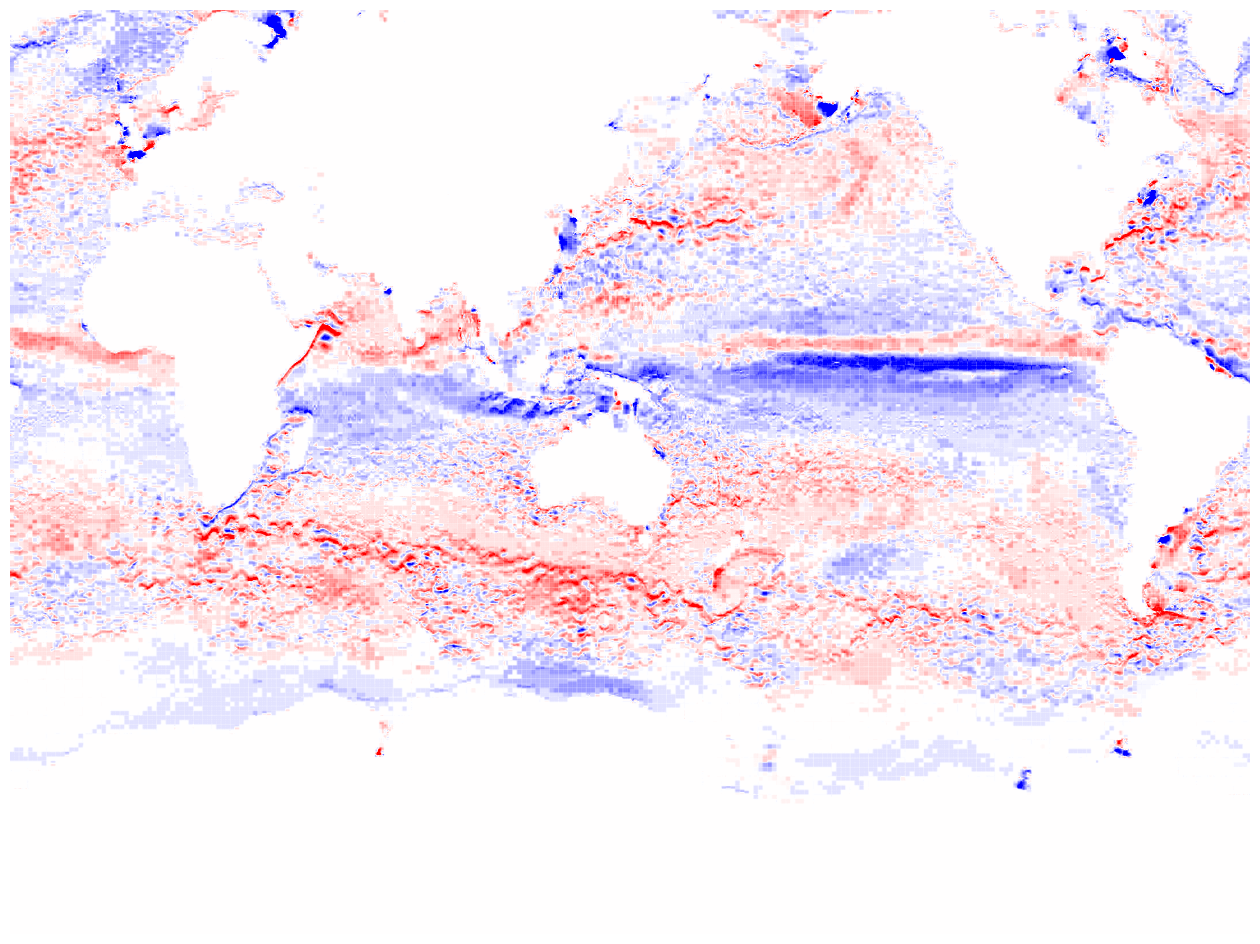

In [6]:
import numpy as np
from matplotlib import pyplot as plt

def get_dimensions(d):
  if d == 0:
    return ('4320', '12960', '64')
  elif d == 1:
    return ('2161', '6481', '33')
  elif d == 2:
    return ('1081', '3241', '17')
  elif d == 3:
    return ('541', '1621', '9')
  elif d == 4:
    return ('271', '811', '5')

def get_accuracy(a):
  if a == 0:
    return '0.000000'
  elif a == 1:
    return '0.001000'
  elif a == 2:
    return '0.010000'
  elif a == 3:
    return '0.100000'
  elif a == 4:
    return '1.000000'
  elif a == 5:
    return '10.000000'

fig = plt.figure(figsize=(16, 12))
plt.axis('off')

for ds in range(1, 5):
  for aa in range(0, 6):
    x, y, z = get_dimensions(ds)
    ac = get_accuracy(aa)

    prefix = 'F:/Workspace/idx2/build/Source/Applications/RelWithDebInfo/'

    file0 = prefix + 'llc4320-u-face-0-depth-0-time-0-64-[' + x + '-' + y + '-' + z + ']-float32-accuracy-' + ac + '.raw'
    file1 = prefix + 'llc4320-u-face-1-depth-0-time-0-64-[' + x + '-' + y + '-' + z + ']-float32-accuracy-' + ac + '.raw'
    file3 = prefix + 'llc4320-v-face-3-depth-0-time-0-64-[' + y + '-' + x + '-' + z + ']-float32-accuracy-' + ac + '.raw'
    file4 = prefix + 'llc4320-v-face-4-depth-0-time-0-64-[' + y + '-' + x + '-' + z + ']-float32-accuracy-' + ac + '.raw'

    a0 = np.fromfile(file0, dtype=np.dtype('<f'))
    a1 = np.fromfile(file1, dtype=np.dtype('<f'))
    a3 = np.fromfile(file3, dtype=np.dtype('<f'))
    a4 = np.fromfile(file4, dtype=np.dtype('<f'))

    a0 = a0.reshape((int(z), int(y), int(x)))[0]
    a1 = a1.reshape((int(z), int(y), int(x)))[0]
    a3 = np.rot90(a3.reshape((int(z), int(x), int(y)))[0])
    a4 = np.rot90(a4.reshape((int(z), int(x), int(y)))[0])

    a = np.concatenate((a0, a1, a3, a4), axis=1)

    vmin = -1
    vmax = 1
    
    output = 'llc4320-' + 'd' + repr(ds) + '-a' + repr(ac) + '.png'
    plt.imshow(a, cmap='bwr', aspect='auto', vmin=vmin, vmax=vmax, origin='lower')
    plt.savefig(output, bbox_inches='tight')
